In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Queation 2(1)

In [14]:
# get the evenly distributed values
N = 10
x_even = np.linspace(0, 1, N+1)
y_even = np.linspace(0, 1, N+1)
x_even = x_even[:-1] + 1 / (2 * N)
y_even = y_even[:-1] + 1 / (2 * N)

data_even = []
for x in x_even:
    for y in y_even:
        data_even.append([x, y])
data_even = np.array(data_even)

# calculate the distance
mean = np.mean(data_even, axis=0)
msd = np.sum((data_even - mean) ** 2) / N ** 2
print('Mean:\t', mean)
print('Distance:\t', msd, '\n')

# Uniformaly distributed data
M = N ** 2
distance = []

for i in range(100000):
    # get random value
    x_random = np.random.random(M)
    y_random = np.random.random(M)
    data_random = np.array([x_random, y_random]).T
    
    tmp_mean = np.mean(data_random, axis=0)
    tmp = np.sum((data_random - tmp_mean) ** 2)
    distance.append(tmp / M)

distance = np.array(distance)
print('Mean distance:\t', np.mean(distance))

print('\n')
print('ration of # < mean:\t', np.sum(np.array(distance) < msd) / len(distance))
print('ration of # > mean:\t', np.sum(np.array(distance) > msd) / len(distance))

Mean:	 [ 0.5  0.5]
Distance:	 0.165 

Mean distance:	 0.165003822506


ration of # < mean:	 0.50317
ration of # > mean:	 0.49683


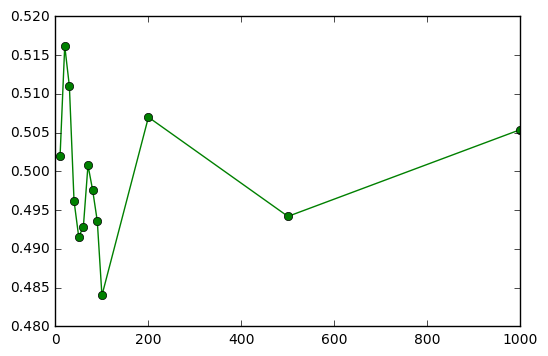

In [15]:
ratio = []
N_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 500, 1000]
for N in N_list:
    # get the evenly distributed values
    x_even = np.linspace(0, 1, N+1)
    y_even = np.linspace(0, 1, N+1)
    x_even = x_even[:-1] + 1 / (2 * N)
    y_even = y_even[:-1] + 1 / (2 * N)

    data_even = []
    for x in x_even:
        for y in y_even:
            data_even.append([x, y])
    data_even = np.array(data_even)

    # calculate the distance
    mean = np.mean(data_even, axis=0)
    msd = np.sum((data_even - mean) ** 2) / N ** 2

    # Uniformaly distributed data
    M = N ** 2
    distance = []

    for i in range(5000):
        # get random value
        x_random = np.random.random(M)
        y_random = np.random.random(M)
        data_random = np.array([x_random, y_random]).T

        tmp_mean = np.mean(data_random, axis=0)
        tmp = np.sum((data_random - tmp_mean) ** 2)
        distance.append(tmp / M)

    distance = np.array(distance)
    ratio.append(np.sum(np.array(distance) < msd) / len(distance))

plt.figure()
plt.plot(N_list, ratio, 'go-')
plt.show()